# Notebook to generate the data for the dynamic detector analysis

In [1]:
import pyDR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
proj=pyDR.Project('LeuData',create=True)    
proj=pyDR.Project()

In [3]:
proj.append_data('ubq1_leu.txt')

In [4]:
d=proj[0]

                   0           1           2           3  ...          21          22          23          24
Type              R1          R1          R1          R1  ...          R1          R1          R1          R1
v0            600.38      600.38      400.25      400.25  ...       14.05       14.22       14.18        13.5
v1                 0           0           0           0  ...           0           0           0           0
vr                 0           0           0           0  ...           0           0           0           0
offset             0           0           0           0  ...           0           0           0           0
stdev     0.00800000  0.01099999  0.02800000  0.01999999  ...  0.18899999  0.20200000  0.18000000  0.21600000
med_val   0.45600000  0.44999998  0.64600002  0.60299998  ...  5.41599988  5.69199991  5.59999990  5.67799997
Nuc              13C         13C         13C         13C  ...         13C         13C         13C         13C
Nuc1      

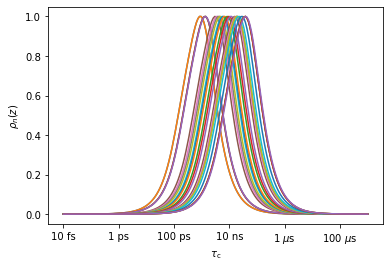

In [5]:
d.sens.plot_rhoz(norm=True)  #This will plot the sensitivities of the experiments you included
print(d.sens.info) #See the parameters describing your experiments. 

In [6]:
molsys=pyDR.MolSys(topo="../../tests/1ubq_data/1ubq_frame.pdb",traj_files="../../tests/1ubq_data/test_001/run_001/traj_4us_PBC_fit.xtc") 

In [7]:
d.select=pyDR.MolSelect(molsys)

In [8]:
resids=[3, 5, 7, 8, 13, 23, 30, 36, 44, 61]
ile_resn = [3, 13, 23, 30, 36, 44, 61]

In [9]:
d.select.select_bond(Nuc='15N',resids=resids)

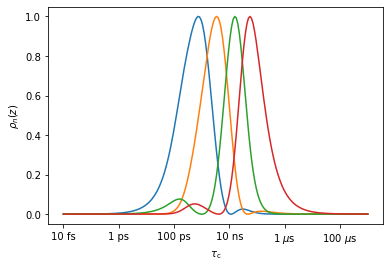

In [10]:
d.detect.r_auto(4)  #Automatically create 4 detectors to process the data
#d.detect.inclS2()   #Create a 5th detector based on inclusion of S2 (REDOR) data. Comment if no S2 included!
d.detect.plot_rhoz()

In [11]:
f=d.fit() #Fit the experimental data (assignment to f is optional. f is automatically appended to project)
print(proj) #See that the processed data is in the project

pyDIFRATE project with 2 data sets

titles:
r:NMR:ubq1_leu
p4:NMR:ubq1_leu



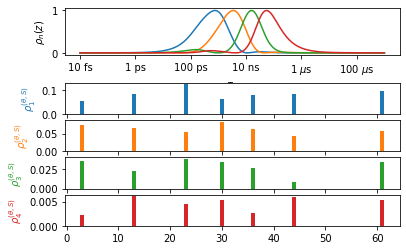

In [12]:
proj['proc'].plot(style='bar') #plot all processed data to single plot (here just one data set)

In [13]:
ptest=proj['proc']
p4 = p4 = ptest.data[1]
r_dec = p4.R

In [14]:
df_rhoz = pd.DataFrame({"tc":p4.sens.tc,"rho1":p4.sens.rhoz[0], "rho2":p4.sens.rhoz[1], "rho3":p4.sens.rhoz[2], "rho4":p4.sens.rhoz[3]})

In [15]:
for i, leu_i in enumerate(ile_resn):
    r_i_1, r_i_2, r_i_3, r_i_4 = r_dec[i]
    df_rhoz[f"ile_{leu_i}_1"] = r_i_1 * df_rhoz.rho1
    df_rhoz[f"ile_{leu_i}_2"] = r_i_2 * df_rhoz.rho2
    df_rhoz[f"ile_{leu_i}_3"] = r_i_3 * df_rhoz.rho3
    df_rhoz[f"ile_{leu_i}_4"] = r_i_4 * df_rhoz.rho4
    df_rhoz[f"sum_{leu_i}"] = df_rhoz[f"ile_{leu_i}_1"] + df_rhoz[f"ile_{leu_i}_2"] + df_rhoz[f"ile_{leu_i}_3"] + df_rhoz[f"ile_{leu_i}_4"]

In [16]:
df_rhoz.to_csv("rhoz.csv")